# Key Driver Analysis - Amusement park NPS data

### Import dataset

In [1]:
import pandas as pd
df= pd.read_csv("/Users/mm679j/Documents/2022-MMA831-Python/data/am_park_data.csv")
df.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


### Conduct some exploratory data analysis

In [2]:
#example - use .dscribe to see basic stats about each colum
df.describe()

,num.child,distance,rides,games,wait,clean,overall
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,1.738000,31.047509,85.84600,78.666000,69.896000,87.898000,51.258000
std,1.495938,33.145445,5.46278,8.123202,10.770757,5.115068,15.878655
min,0.000000,0.526723,72.00000,57.000000,40.000000,74.000000,6.000000
25%,0.000000,10.318091,82.00000,73.000000,62.000000,84.000000,40.000000
50%,2.000000,19.019093,86.00000,78.000000,70.000000,88.000000,50.000000
75%,3.000000,39.582050,90.00000,85.000000,77.000000,91.000000,62.000000
max,5.000000,239.192134,100.00000,100.000000,100.000000,100.000000,100.000000


In [ ]:
#Histograms

In [ ]:
#Correlation matrix, check for multi-colinearity

In [ ]:
#

### Data Transformations

In [ ]:
#Are there any data transformation we want to make (to deal with skew, check for nulls, etc.?)

In [ ]:
#

In [ ]:
#

### Model fitting

In [ ]:
#Use sample code from in class tutorial and adjust to run regression for key driver analysis
#what is your target variabe?

In [5]:
df_clean=df

In [7]:
#import statsmodels.formula.api as sm
model = sm.ols(formula="overall ~ rides + games + wait + clean", data=df_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.72e-86
Time:                        19:43:39   Log-Likelihood:                -1887.0
No. Observations:                 500   AIC:                             3784.
Df Residuals:                     495   BIC:                             3805.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -131.4092      8.334    -15.768      0.0

In [8]:
## note you can access coefficient, CI, and covariate names from model object
model1.params
model1.conf_int()
err_series = lin_reg.params - lin_reg.conf_int()[0]


Intercept   -131.409194
rides          0.529078
games          0.153336
wait           0.553326
clean          0.984213
dtype: float64

In [18]:
# first we canculate error bar lenghts:
err_series = model1.params - model1.conf_int()[0]

#also we usually don't care about intercepts so keep everything from index 1 onwards
coef_df = pd.DataFrame({'coef': model1.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df


['rides', 'games', 'wait', 'clean']

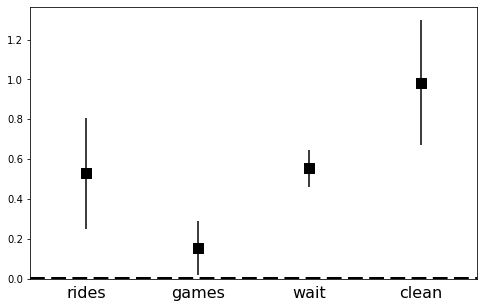

In [22]:
## Code sample below will create a simple plot of coefficients
from matplotlib import pyplot as plt
import numpy as np
colnames=list(coef_df['varname'])

fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(colnames, 
                       rotation=0, fontsize=16)